<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/Predict_local_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow==2.0.0-beta1

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [302]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import skimage 
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import cv2
import os
from tqdm import tqdm
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import h5py
from urllib.request import urlopen




print(tf.__version__)

2.1.0


# Cargamos modelo pre-entrenado

El modelo que fue pre-entrenado logro una exactitud del ***70 %*** en la clasificación de las flores 

In [7]:
!ls

'Modelo entrenado_FR.zip'   sample_data


In [175]:
os.listdir('Modelo entrenado')

['.ipynb_checkpoints',
 'pesos_FR_.h5',
 'modelo_FR_.h5',
 'Flores de prueba',
 'Predict.ipynb']

In [0]:
longitud, altura = 200, 200
modelo = 'Modelo entrenado/modelo_FR_.h5'
pesos_modelo = 'Modelo entrenado/pesos_FR_.h5'
cnn = keras.models.load_model(modelo)
cnn.load_weights(pesos_modelo)

In [209]:
os.listdir('Modelo entrenado/Flores de prueba/')

['dandelion', 'daisy', 'sunflower', 'rose', 'tulip']

In [0]:
especie=['daisy','dandelion','rose','sunflower','tulip']

# Rutas de las imagenes

In [179]:
ruta_img=[]
for flower in tqdm(range(len(especie))):

  for i in os.listdir('Modelo entrenado/Flores de prueba/'+especie[flower]):
    
      ruta_img.append('Modelo entrenado/Flores de prueba/'+especie[flower]+'/'+ str(i))
    

100%|██████████| 5/5 [00:00<00:00, 6498.77it/s]


# Imagenes 

In [193]:
test_img=[]
test_tag=[]

for flower in tqdm(range(len(especie))):

  for i in os.listdir('Modelo entrenado/Flores de prueba/'+especie[flower]):

    try : 
      img=cv2.imread('Modelo entrenado/Flores de prueba/'+especie[flower]+'/'+i)
      test_img.append(cv2.resize(img,(longitud,altura)))
  
   
      if (especie[flower]=='daisy'):
        test_tag.append(0)
      elif (especie[flower]=='dandelion'):
        test_tag.append(1)
      elif (especie[flower]=='rose'):
        test_tag.append(2)
      elif (especie[flower]=='sunflower'):
        test_tag.append(3)  
      else:
        test_tag.append(4)
    except:
      pass

100%|██████████| 5/5 [00:00<00:00,  5.35it/s]


In [194]:
len(test_img)

271

In [133]:
len(ruta_img)

271

# Función predicción imagenes locales

In [0]:
# Local
def predict(path_file):

  #x = load_img(path_file, target_size=(longitud, altura))
  x = np.asarray(path_file)
  x = x/ 255.0
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  #result = array[0]
  answer = np.argmax(array)
  if answer == 0:
    resultado="Class : Daisy"
  elif answer == 1:
    resultado="Class : Dandelion"
  elif answer == 2:
    resultado="Class : Rose"
  elif answer == 3:
    resultado="Class : Sunflower"
  else:
    resultado="Class : Tulip"
  plt.figure()
  plt.imshow(path_file)
  plt.colorbar()
  plt.grid(False)
  #titulo=predict(test_img[190])
  plt.title(resultado)
  

  return plt.show()

In [230]:
ruta_img[190]

'Modelo entrenado/Flores de prueba/sunflower/200557981_f800fa1af9.jpg'

# Predicción de nuestro modelo localmente

**predict**(*path_img*)

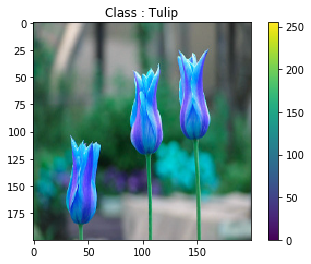

In [380]:
predict(test_img[251])  

# Imagenes de la web 

In [0]:
url='https://www.theflowerexpert.com/media/images/mostpopularflowers/morepopularflowers/sunflower/sunflower.jpg'

# Función visualización imagenes de la web

In [0]:
def foto_web():
  foto=skimage.io.imread(input('Ingresa la url de la imagen : '))

  plt.figure()
  plt.imshow(foto)
  plt.colorbar()
  plt.grid(False)
  
  return plt.show()



# Función predicción imagenes de la web

In [0]:
# URL
def predict_url():


  # Ingresamos la url
  foto=skimage.io.imread(input('Ingresa la url de la imagen : '))
  
  x = np.asarray(foto)
  x = np.resize(x,(200,200,3))
  x=x/255.0
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  #result = array[0]
  answer = np.argmax(array)
  
  if answer == 0:
    resultado="Class : Daisy"
  elif answer == 1:
    resultado="Class : Dandelion"
  elif answer == 2:
    resultado="Class : Rose"
  elif answer == 3:
    resultado="Class : Sunflower"
  else:
    resultado="Class : Tulip"
  
  plt.figure()
  plt.imshow(foto)
  plt.colorbar()
  plt.grid(False)
  plt.title(resultado)
  

  return plt.show()

# Visualizamos

Ingresa la url de la imagen : https://lh3.googleusercontent.com/proxy/5zZSM9V2nb7DmJcfT7zo6CPfvYRcOC7JoSOmR1Xgg24c6EkU791Em7kw4FQls7unIRfucvKp5iSw5noIxfk7Dnu1TDzjB14p3TqL4eBHLy4Fq88eXZOjNB6P3Gz82F3hrSqfhGGaRWTTtos


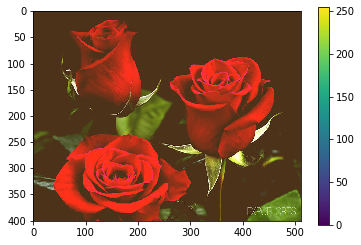

In [322]:
foto_web()

# Imagenes de prueba - Web

In [0]:
Rosa='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ4HuzWqyo5qAOO4kWU3w2xGtc0Sz9IEuaQfKXPnWsfWbOMl_G6'
Daisy='https://images.unsplash.com/photo-1560717789-0ac7c58ac90a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80'
Daisy2='https://previews.123rf.com/images/somethingsweet/somethingsweet1408/somethingsweet140800006/31086696-daisy-blanco-flor-margarita-margarita-ojo-del-d%C3%ADa.jpg'
tulipan='https://www.floreshermosas.top/wp-content/uploads/2019/05/tulipan-morado-800x445.jpg'
dandelion='https://cdn-prod.medicalnewstoday.com/content/images/articles/324/324083/dandelions-in-a-field.jpg'
dandelion2='https://dbdzm869oupei.cloudfront.net/img/photomural/large/5dcd39f8ae827.jpg'
sunflower='https://live.staticflickr.com/206/521403977_8349c394cc_b.jpg'
sunflower1='https://cache.desktopnexus.com/thumbseg/724/724895-bigthumbnail.jpg'

Ingresa la url de la imagen : https://cache.desktopnexus.com/thumbseg/724/724895-bigthumbnail.jpg


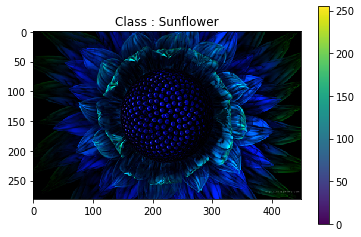

In [390]:
predict_url()

# FIN